In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# load the result sets
df = pd.read_csv("./results/result.csv")
df_del_hashtag = pd.read_csv("./results/result_del_hashtag.csv")
df_hashtags_removed = pd.read_csv("./results/result_hashtags_removed.csv")

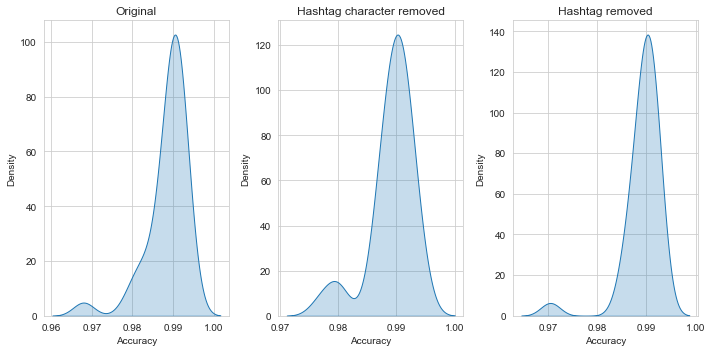

In [40]:
fig, ax = plt.subplots(1,3,figsize=(10, 5))
sns.kdeplot(df["Accuracy"], fill=True, ax=ax[0]).set(title='Original')
sns.kdeplot(df_del_hashtag["Accuracy"], fill=True, ax=ax[1]).set(title='Hashtag character removed')
sns.kdeplot(df_hashtags_removed["Accuracy"], fill=True, ax=ax[2]).set(title='Hashtag removed')
fig.tight_layout()
#fig.suptitle('Accuracy density')
plt.show()

In [41]:
print('accuracy mean original: {}'.format(df["Accuracy"].mean()))
print('accuracy mean hashtag character removed: {}'.format(df_del_hashtag["Accuracy"].mean()))
print('accuracy mean hashtags removed: {}'.format(df_hashtags_removed["Accuracy"].mean()))

accuracy mean original: 0.9885356347438752
accuracy mean hashtag character removed: 0.989120267260579
accuracy mean hashtags removed: 0.9891870824053453


## Model comparison

In [42]:
df['Model'] = 'Original'
df_del_hashtag['Model'] = 'Hashtag character removed'
df_hashtags_removed['Model'] = 'Hashtags removed'

df_all = pd.concat([df, df_del_hashtag, df_hashtags_removed])
df_all.head()

,Accuracy,Precision,Recall,F1,Model
0,0.983697,0.968716,0.998137,0.983206,Original
1,0.967929,0.950840,0.983548,0.966918,Original
2,0.988953,0.994139,0.982620,0.988346,Original
3,0.990913,0.988155,0.992933,0.990538,Original
4,0.988241,0.990211,0.985478,0.987839,Original


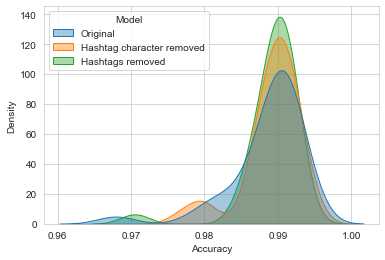

In [44]:
# to save space in the report, put all density graphs onto each other
# This already hints at no significant difference.

ax = sns.kdeplot(data=df_all, x="Accuracy", hue="Model", fill=True, common_norm=False, alpha=0.4)
sns.move_legend(ax, "upper left")
plt.show()

[Text(0.5, 1.0, 'Mean accuracy score')]

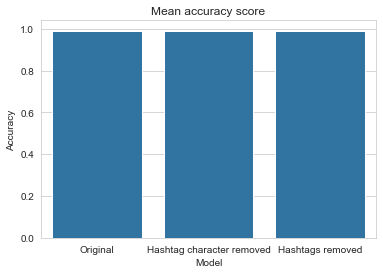

In [46]:
sns.barplot(x="Model", y="Accuracy", data=df_all).set(title='Mean accuracy score')

Having run the three models with the same seeds, we cannot do an ANOVA test on the models (true independency can not be established, although the inputs were essentially different).

Hence, perform two paired samples t-test (paired because the train-test-splits were identical).

We are interested in the comparison of both modified datasets with the original (not with each other), meaning the hypotheses are:

1.
Null: The mean accuracy of the original and hashtag character removed from the input set are equal
Alternative: The mean accuracy on the input set with the hashtag character removed differs from the mean accuracy of the original

2.
Null: The mean accuracy of the original and hashtags completely removed from the input set are equal
Alternative: The mean accuracy on the input set with the hashtags completely removed differs from the mean accuracy of the original

As it turns out, we cannot reject both null-hypotheses and conclude that the mean accuracies of the original and the hashtag character removed from the input do not differ, and the mean accuracies of the original and the hashtags completely removed from the input do not differ.

In [47]:
from scipy.stats import ttest_rel
#t_statistic, p_value = ttest_1samp(a=asymmetric_sample['mean_delay_seconds'], popmean=pop_mean, alternative='less')

ttest_rel(df["Accuracy"], df_del_hashtag["Accuracy"])

TtestResult(statistic=-0.4810765153122368, pvalue=0.6338403912381463, df=31)

In [48]:
ttest_rel(df["Accuracy"], df_hashtags_removed["Accuracy"])

TtestResult(statistic=-0.5557989937116712, pvalue=0.5823378087872619, df=31)

In [49]:
# and to ensure there are no weird outcomes, compare the two modified ones as well
ttest_rel(df_del_hashtag["Accuracy"], df_hashtags_removed["Accuracy"])

TtestResult(statistic=-0.09552383874022674, pvalue=0.9245135907661256, df=31)